# **Customer Clustering Project**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [7]:
#Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#Show all columns on output
pd.set_option('display.max.columns',999)

### **Explorative Data Analysis**

In [8]:
df = pd.read_excel("C:/Users/PC/Desktop/Python/customer_clustering_/online_retail_II.xlsx", sheet_name=0)

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [11]:
df.describe() # describes only numeric data

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [12]:
df.describe( include = 'O') # describes object data

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [13]:
# taking a look at data with missing customer id

df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


Exploring Quantity Column

In [14]:
# taking a look at data with negative quantity

df[df['Quantity']<0].head(10)  # C at the start of the Invoice Number means Cancellation


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [15]:
df['Invoice'] = df['Invoice'].astype('str') # converting into string to be able to apply regex 
df[df['Invoice'].str.match('^\\d{6}$')== False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [16]:
# is C the only character that appears?

df['Invoice'].str.replace('[0-9]', '', regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [17]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Exploring StockCode

In [18]:
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match('^\\d{5}$') == True].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085.00,United Kingdom
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom


In [19]:
df[df['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [20]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) 
   & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [21]:
df[df['StockCode'].str.contains('^PADS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [22]:
df[df['StockCode'].str.contains('^POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [23]:
df[df['StockCode'].str.contains('^B')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2010-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.00,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.00,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.00,United Kingdom


StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+

In [24]:
import pandas as pd

# Creating the DataFrame
data = {
    "Code": ["DCGS", "D", "DOT", "M or m", "C2", "C3", "BANK CHARGES or B", "S", "TESTXXX", "gift__XXX", "PADS", "SP1002", "AMAZONFEE", "ADJUSTX"],
    "Description": [
        "Looks valid, but some quantities are negative, and customer ID is null.",
        "Represents discount values.",
        "Represents postage charges.",
        "Represents manual transactions.",
        "Carriage transaction; meaning is unclear.",
        "Unclear meaning, with only one recorded transaction.",
        "Represents bank charges.",
        "Indicates samples sent to customers.",
        "Testing data, not valid for analysis.",
        "Purchases with gift cards; lacks customer data but may be useful for another analysis.",
        "Appears to be a legitimate stock code for padding.",
        "Special request item with two transactions; three appear legitimate, but one has a price of zero.",
        "Likely fees related to Amazon shipping or services.",
        "Manual account adjustments made by administrators."
    ],
    "Action": [
        "Exclude from clustering",
        "Exclude from clustering",
        "Exclude from clustering",
        "Exclude from clustering",
        "Exclude from clustering",
        "Exclude",
        "Exclude from clustering",
        "Exclude from clustering",
        "Exclude from clustering",
        "Exclude",
        "Include",
        "Exclude for now",
        "Exclude for now",
        "Exclude for now"
    ]
}

df_1 = pd.DataFrame(data)

# Display the DataFrame
df_1


,Code,Description,Action
0,DCGS,"Looks valid, but some quantities are negative,...",Exclude from clustering
1,D,Represents discount values.,Exclude from clustering
2,DOT,Represents postage charges.,Exclude from clustering
3,M or m,Represents manual transactions.,Exclude from clustering
4,C2,Carriage transaction; meaning is unclear.,Exclude from clustering
5,C3,"Unclear meaning, with only one recorded transa...",Exclude
6,BANK CHARGES or B,Represents bank charges.,Exclude from clustering
7,S,Indicates samples sent to customers.,Exclude from clustering
8,TESTXXX,"Testing data, not valid for analysis.",Exclude from clustering
9,gift__XXX,Purchases with gift cards; lacks customer data...,Exclude


## Data Cleaning

In [25]:
cleaned_df = df.copy()

In [26]:
cleaned_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [27]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
mask = (
    cleaned_df['Invoice'].str.match('^\\d{6}$') == True
)
cleaned_df = cleaned_df[mask]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [28]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask_1 = (
    (cleaned_df['StockCode'].str.match('^\\d{5}$')== True)
    |(cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')== True)
    |(cleaned_df['StockCode'].str.match('^PADS$')== True)
)

cleaned_df = cleaned_df[mask_1]
cleaned_df



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [29]:
cleaned_df.dropna(subset = ['Customer ID'], inplace = True)

In [30]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [31]:
len(cleaned_df [cleaned_df['Price'] == 0])

28

In [32]:
cleaned_df= cleaned_df[cleaned_df['Price']>0]

In [33]:
cleaned_df.describe() # in this case 0 in a Price column  is just a very small number

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [34]:
cleaned_df['Price'].min()

np.float64(0.001)

In [35]:
len(cleaned_df)/len(df) #23% of the data is lost due to cleaning

0.7732429238325965

## Feature Engeneering

In [36]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']*cleaned_df['Price']
cleaned_df

C:\Users\PC\AppData\Local\Temp\ipykernel_24468\3511970235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']*cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [37]:
aggregated_df = cleaned_df.groupby( by = 'Customer ID', as_index=False) \
.agg(
    MonetaryValue = ('SalesLineTotal', 'sum'),
    Frequency = ('Invoice', 'nunique'),
    LastInvoiceDate = ('InvoiceDate', 'max')
)
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [38]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [39]:
aggregated_df['Recency'] = (max_invoice_date- aggregated_df['LastInvoiceDate']).dt.days
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


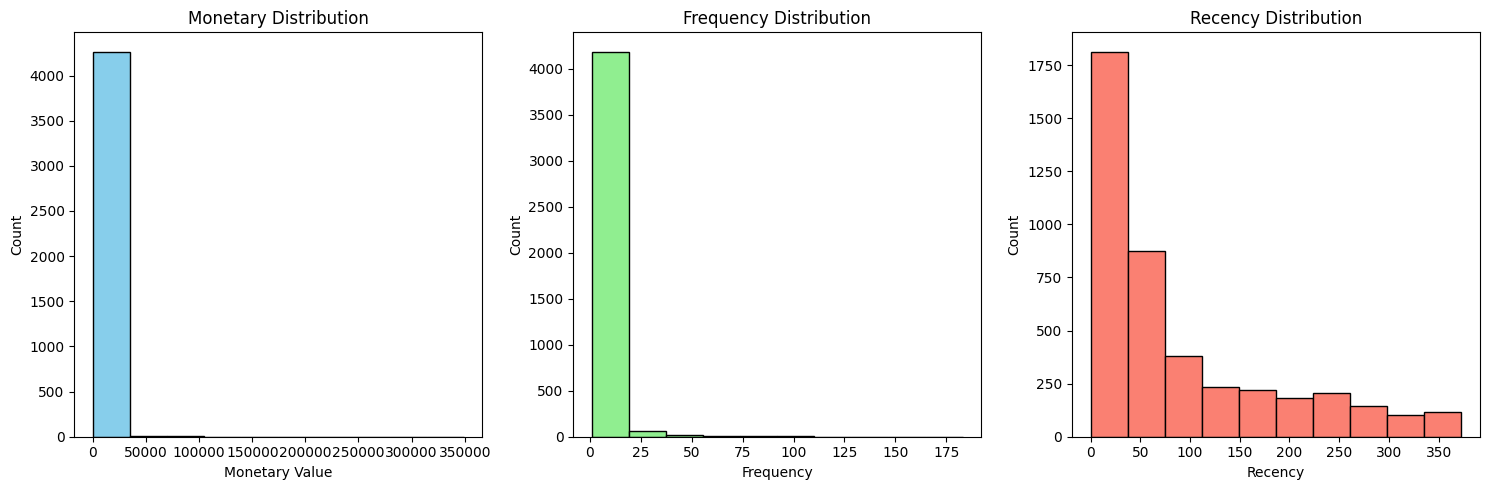

In [40]:
# visualizing new features
plt.figure(figsize =(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins = 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins = 10, color = 'salmon', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

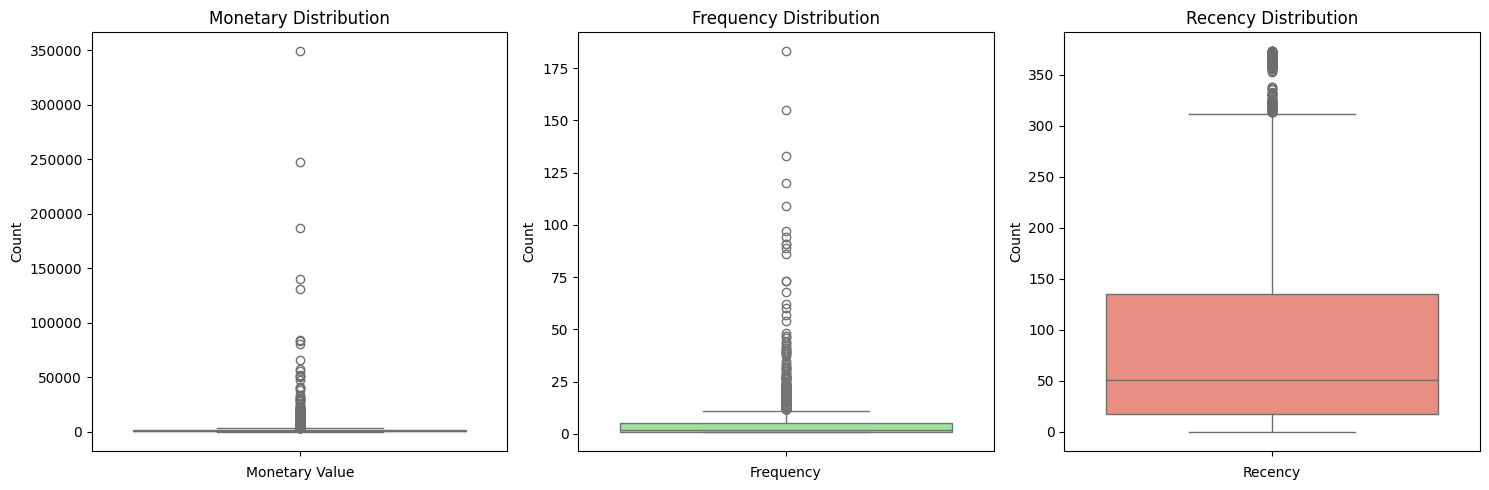

In [41]:
# making boxplots
plt.figure(figsize =(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_df['MonetaryValue'],  color = 'skyblue')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df['Frequency'],  color = 'lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df['Recency'], color = 'salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#  as we can see we have to deal with outliers
# we have to separate outliers for extra analysis

In [42]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3-M_Q1 # interquartal range

monetary_outliers_df = aggregated_df[
(aggregated_df['MonetaryValue'] > (M_Q3+1.5*M_IQR))
| (aggregated_df['MonetaryValue']< (M_Q1-1.5*M_IQR))].copy()

monetary_outliers_df.describe() # high spenders
 

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [43]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3-F_Q1 # interquartal range

frequency_outliers_df = aggregated_df[
(aggregated_df['Frequency'] > (F_Q3+1.5*F_IQR))
| (aggregated_df['Frequency']< (F_Q1-1.5*F_IQR))].copy()

frequency_outliers_df.describe() # highly frequent spenders 

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [44]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) 
                                &
                                (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


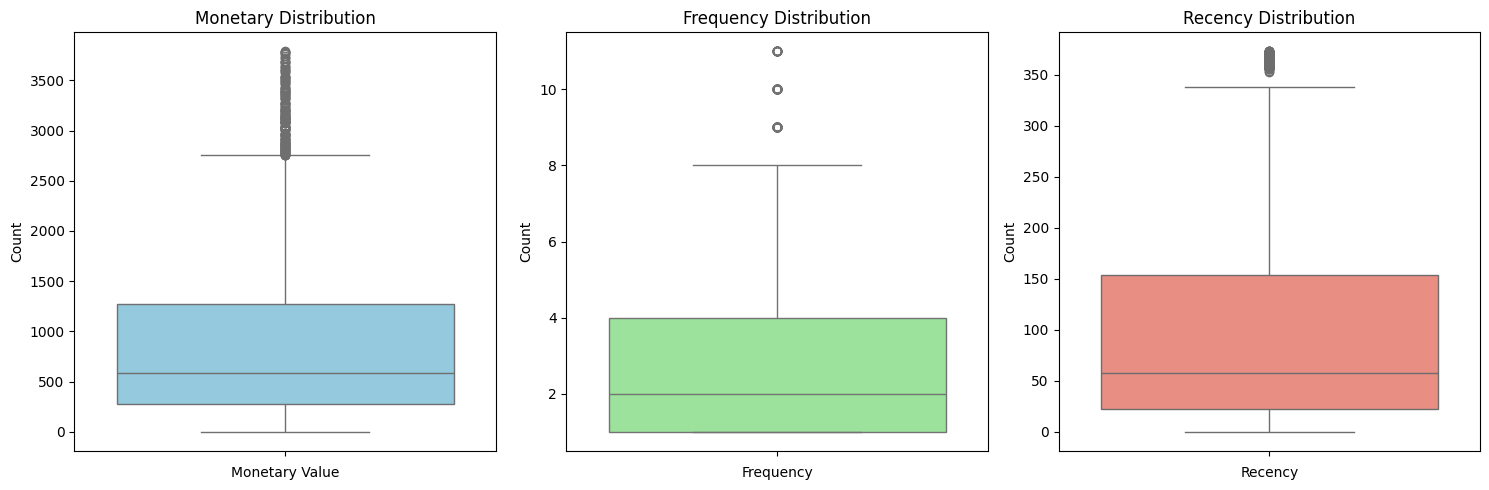

In [45]:
# reploting boxplots to see if we have solved the priblem with outliers
plt.figure(figsize =(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_df['MonetaryValue'],  color = 'skyblue')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers_df['Frequency'],  color = 'lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_df['Recency'], color = 'salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()  # it looks way better now


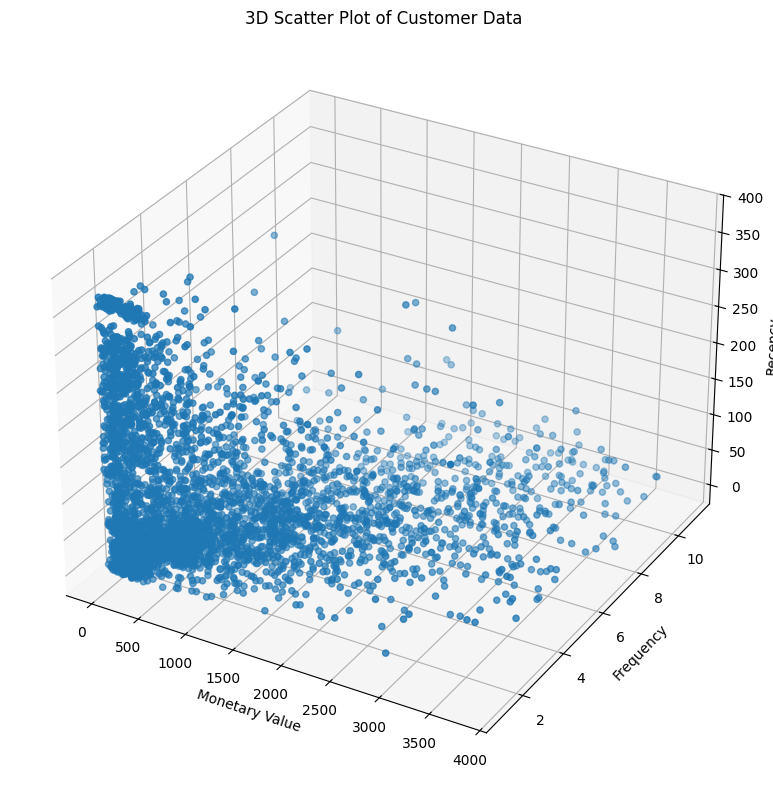

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter( non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

Standard Scaling transofroms the feature of your data to  have a mean of 0 and a standard deviation of 1, ensuring that each featuer contributes equelly to the analysis


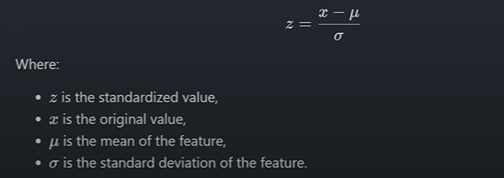

In [47]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [48]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, 
                              columns = ('MonetaryValue', 'Frequency','Recency'))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


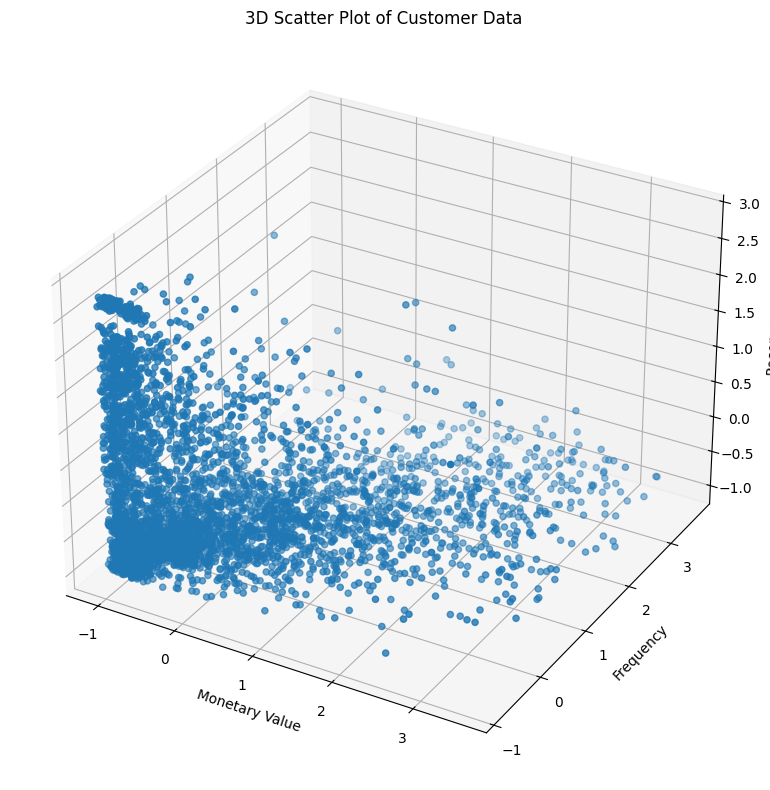

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter( scaled_data_df['MonetaryValue'], 
                     scaled_data_df['Frequency'], 
                     scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

## **KMeans Clustering**

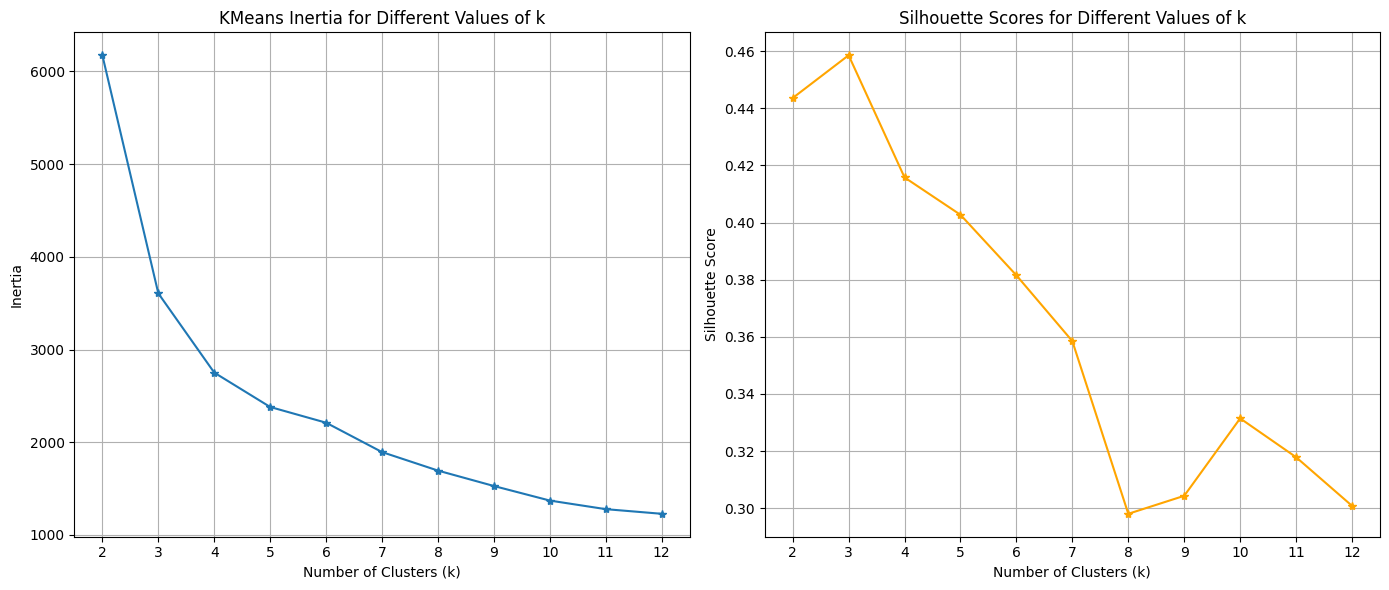

In [57]:
# number of clusters is determined by the number of centroids
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values: 

    kmeans = KMeans(n_clusters= k, random_state= 42, max_iter = 1000) # repeatable
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values,inertia, marker = '*')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values,silhouette_scores, marker = '*', color = 'orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

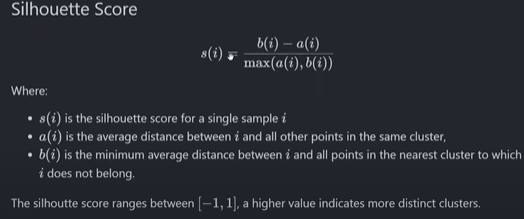

In [ ]:
kmeans = KMeans( n_clusters=4, random_state =42, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels # different clusters we got

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [59]:
non_outliers_df['Cluster']= cluster_labels
non_outliers_df

C:\Users\PC\AppData\Local\Temp\ipykernel_24468\3470492757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster']= cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


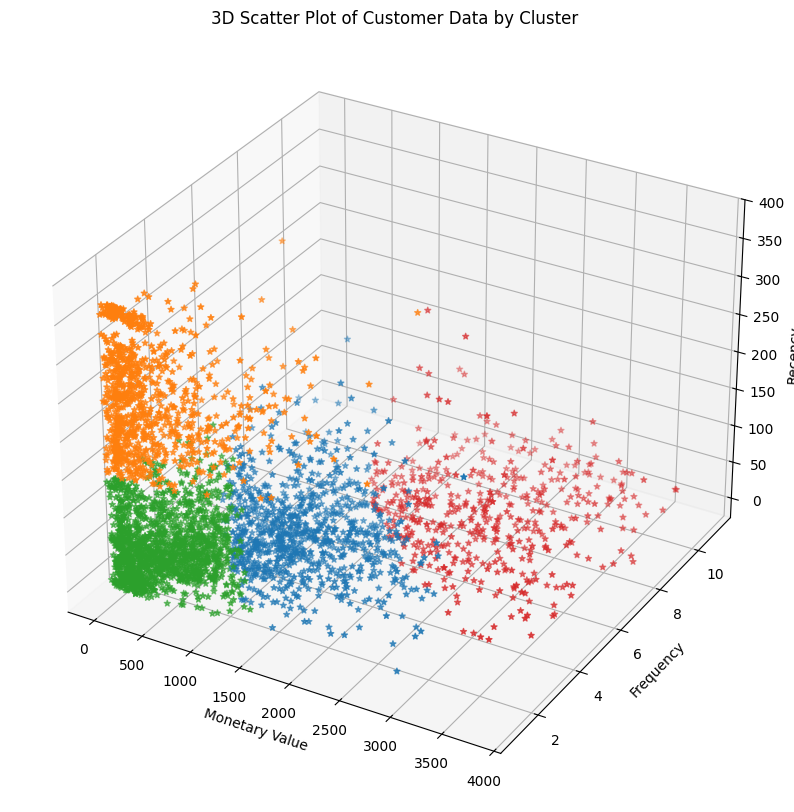

In [63]:
#Visualizing clusters 

cluster_colors = {
    0: '#1f77b4', #blue
    1: '#ff7f0e' ,#orange
    2: '#2ca02c', #green 
    3: '#d62728'  #red
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

scatter= ax.scatter( non_outliers_df['MonetaryValue'],
                    non_outliers_df['Frequency'],
                    non_outliers_df['Recency'],
                    c = colors,
                    marker='*')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')
plt.show()

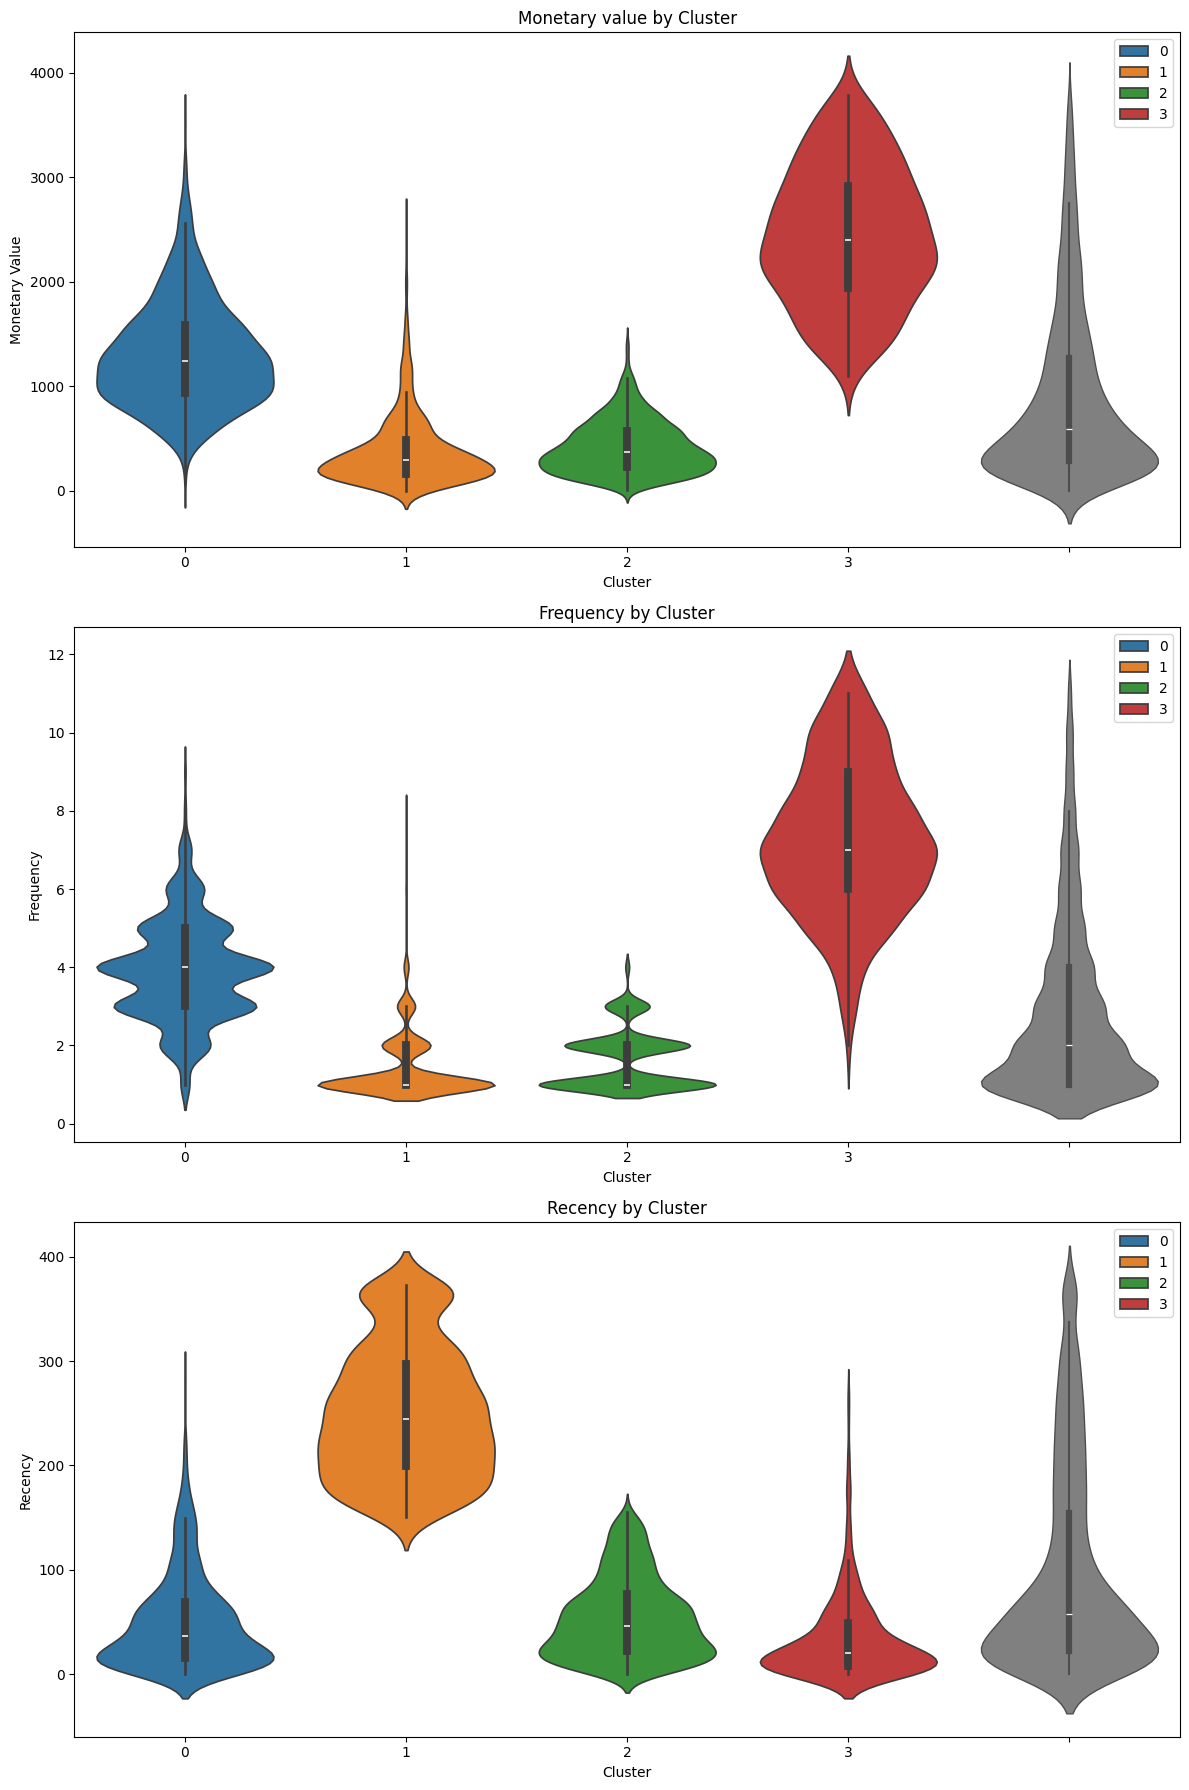

In [66]:
# Creating Violin Plots

plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot( x = non_outliers_df['Cluster'], y = non_outliers_df['MonetaryValue'], palette = cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['MonetaryValue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot( x = non_outliers_df['Cluster'], y = non_outliers_df['Frequency'], palette = cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot( x = non_outliers_df['Cluster'], y = non_outliers_df['Recency'], palette = cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [ ]:
# interpreting what the clusters represent and giving them meaningfull names

#### 1. Cluster 0 (Blue): 'Retain'
* Rationale : This cluster represents high-value customners who purchase regularly , though not
always very recently. The focus should be on retention efforts to maintain their loyalty and
spending levels
* Action: Implement loyalty programs, personalized offers and regular engagement to ensure they remain active

#### 2.Cluster 1 (Orange) : 'Re-Engage'
* Rationale: This group includes lower-value, infrequent buyers, who have nor purchased recently.
The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns , special discounts, or reminders to encourage them to return and purchase again

#### 3. Cluster 2 (Green): 'Nurture'
* Rationale : This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending
* Action : Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

#### 4. Cluster 3 (Red): 'Reward'
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are most loyal customers and rewarding their loyalty is key to maintaining their engagement 
* Action: Implement a robust loyalty program, provide exclusive offers and recognize their loyalty to keep them engaged and satisfied.

In [ ]:
monetary_outliers_df
frequency_outliers_df # overlap is possible--3 manual clusters



In [68]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_outliers_only = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_outliers_only['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_outliers_only, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


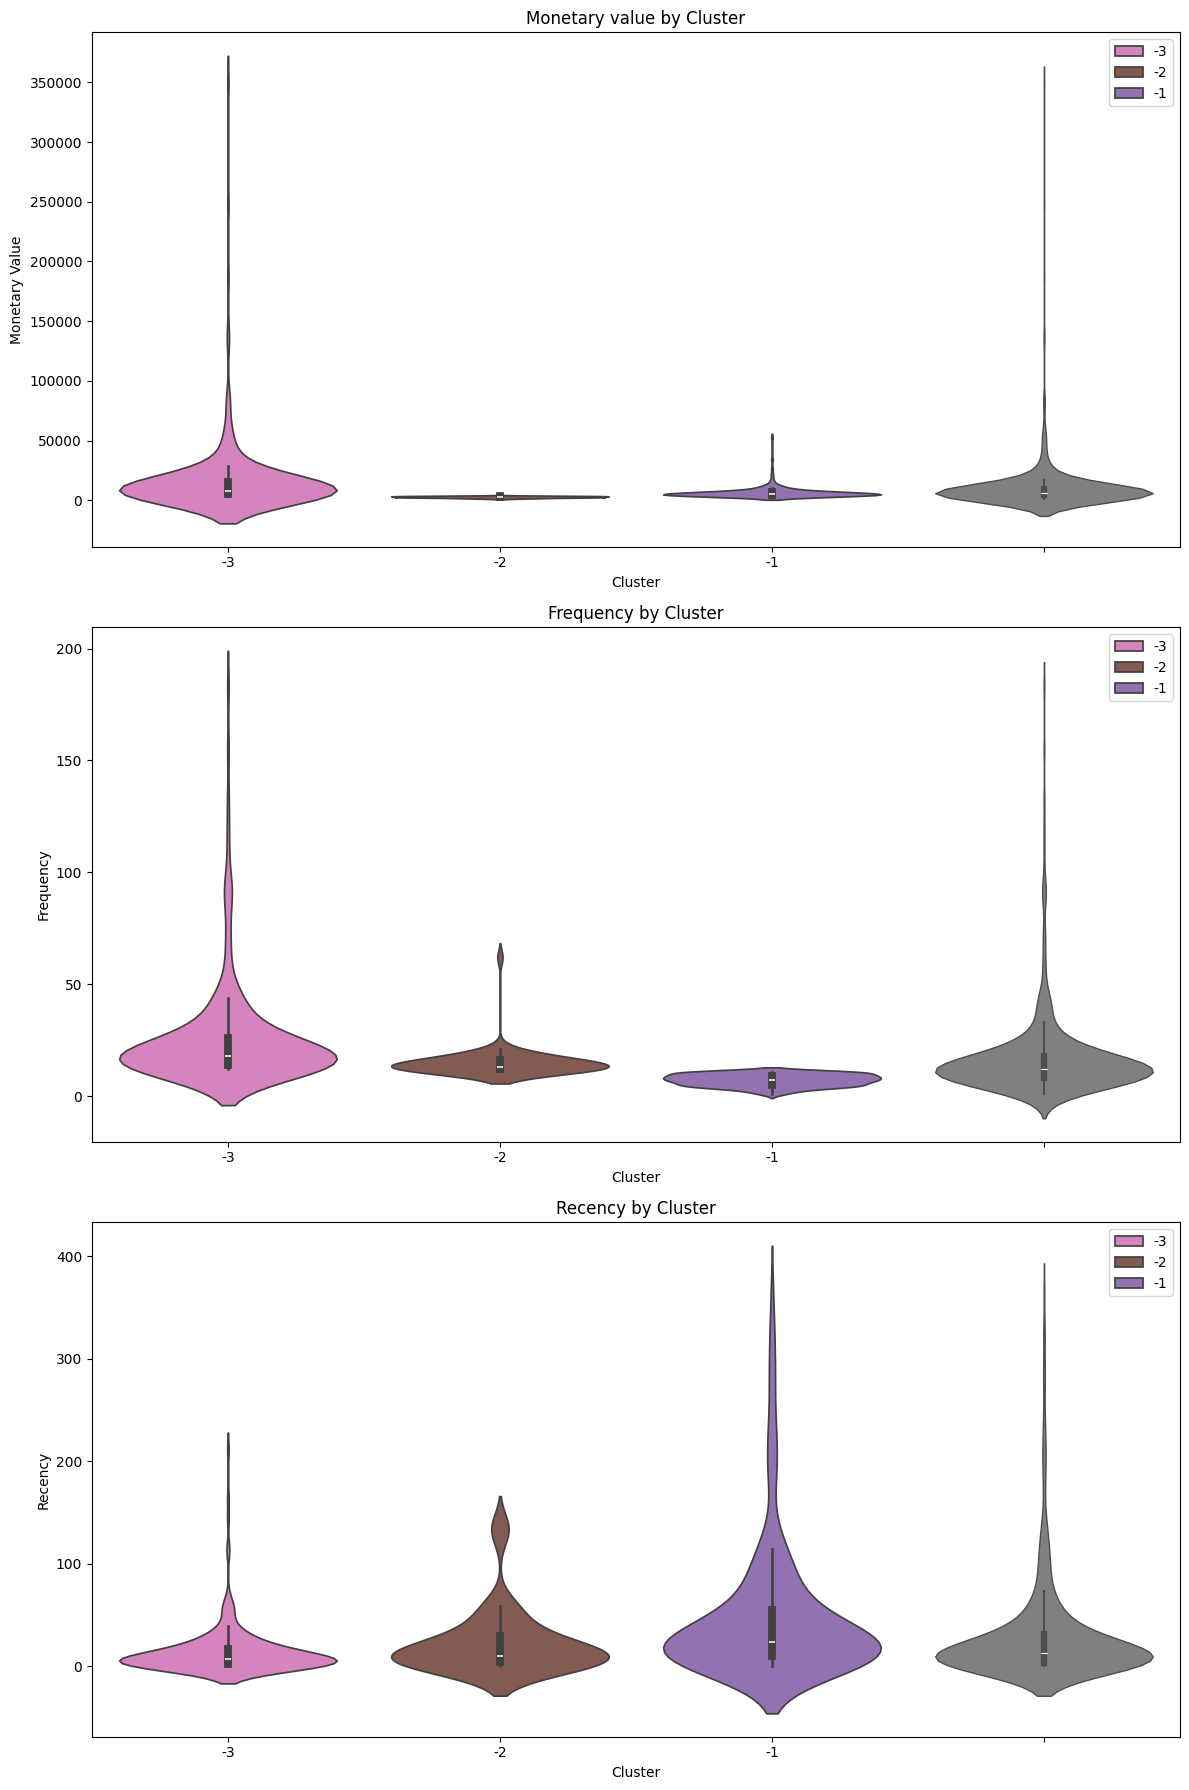

In [71]:
# Creating Violin Plots
cluster_colors_2 = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}

plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot( x = outlier_clusters_df['Cluster'], y = outlier_clusters_df['MonetaryValue'], palette = cluster_colors_2, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y = outlier_clusters_df['MonetaryValue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot( x = outlier_clusters_df['Cluster'], y = outlier_clusters_df['Frequency'], palette = cluster_colors_2, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y = outlier_clusters_df['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot( x = outlier_clusters_df['Cluster'], y = outlier_clusters_df['Recency'], palette = cluster_colors_2,hue = outlier_clusters_df['Cluster'])
sns.violinplot(y = outlier_clusters_df['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster -1 ( Monetary Outliers) PAMPER:
Characteristics : High spenders but not neccesserilyl frequent buyers. Their purchases are large but infrequent. 
Potentiol Strategy: Focus on maintaining their loyalty wit personalized offers or luxury services that cater to their high spending capacity

2. Cluster -2 ( Frequency Outliers) UPSELL:
Characteristics: Freduwnt buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. 
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement

3. Cluster -3 ( Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offeres to maintain their loyalty and encourage continued engagement.

In [74]:
cluster_labels = {
    0: 'RETAIN',
    1: 'RE-ENGAGE',
    2: 'NURTURE',
    3: 'REWARD',
    -1: 'PAMPER',
    -2: 'UPSELL',
    -3: 'DELIGHT'
}

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


C:\Users\PC\AppData\Local\Temp\ipykernel_24468\342854802.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')


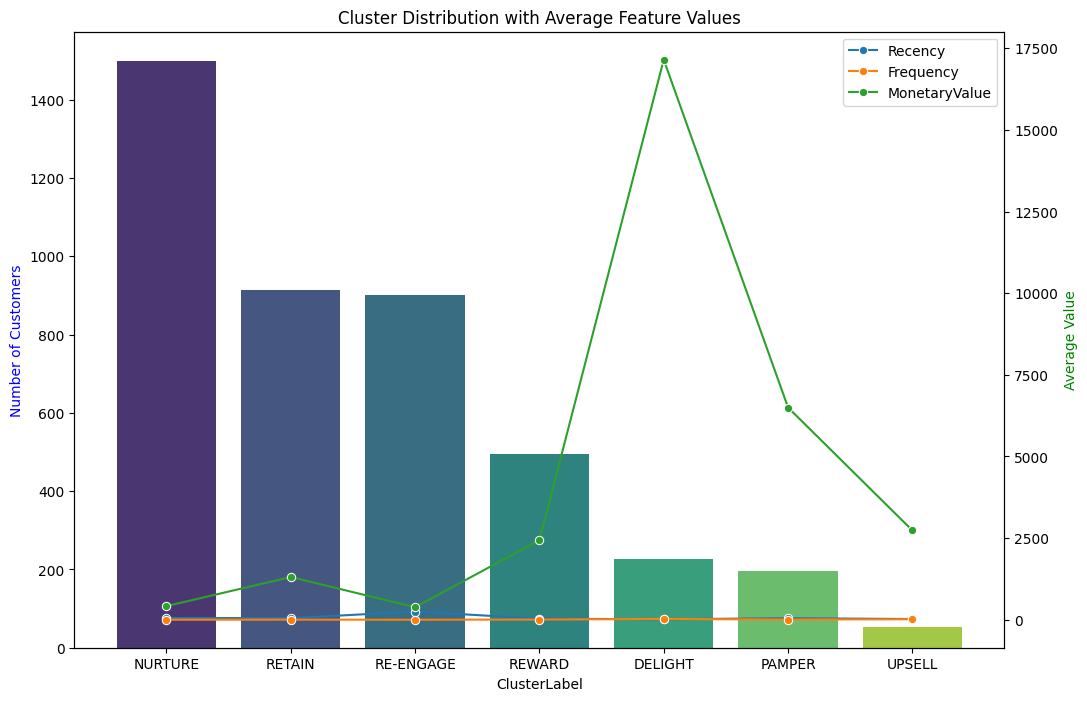

In [82]:
#Summarising all our findings in a single Visual

# Count of customers per cluster
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

# Mean of features per cluster
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot: Cluster distribution
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Second y-axis for line plot
ax2 = ax1.twinx()

# Line plot: Average Recency, Frequency, and MonetaryValue per cluster
sns.lineplot(data=feature_means, ax=ax2, marker='o', dashes=False)
ax2.set_ylabel('Average Value', color='g')

plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_24468\1380040841.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')


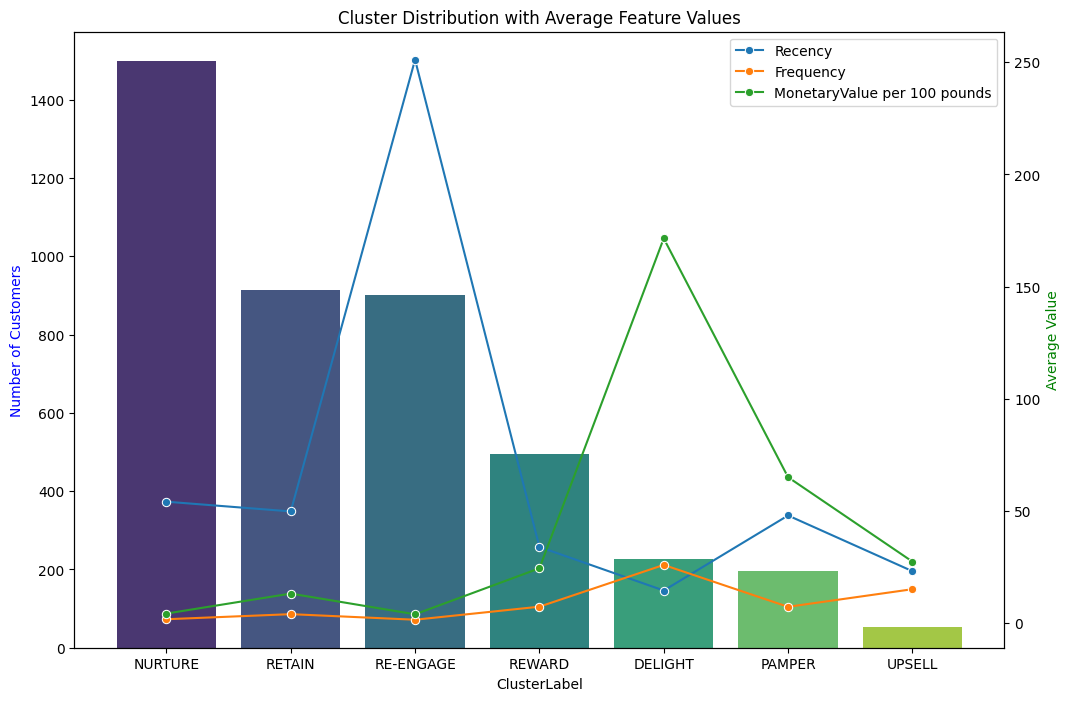

In [ ]:
# making scaling of line plot better to read

# Count of customers per cluster
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df['MonetaryValue per 100 pounds'] = full_clustering_df['MonetaryValue']/100

# Mean of features per cluster
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot: Cluster distribution
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Second y-axis for line plot
ax2 = ax1.twinx()

# Line plot: Average Recency, Frequency, and MonetaryValue per cluster
sns.lineplot(data=feature_means, ax=ax2, marker='o', dashes=False)
ax2.set_ylabel('Average Value', color='g')

plt.show()